In [38]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import numpy as np

''' MAIN PURPOUSE CATEGORY ALGORITHMS AND DIVIDR INCWAGE PER STATUS (RICO, POBRE, MEDIA CLASSE) ... '''

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('display.precision', 3)

### Reading dataset

In [17]:
data = pandas.read_csv('data.csv', sep=',', na_values=".")
'''data=data.drop(labels='Index',axis=1)'''
data

,numprec,region,metro,relate,age,sex,race,marst,bpl,sch,educ99,empstat,classwkr,wkswork1,uhrswork,incwage,ftype,annhrs,hrwage,adj_ind,adj_occ2name
0,1,New England Division,Not in metro area,Head/Householder,62,Male,White nonhisp,Never married/single,United States,Associate's degree,Associate's degree 1,At work,"Wage/salary, private sector",52,44,57000.0,Nonfamily householder,2288,24.913,Outpatient care centers,"Consruction, Extraction, Installation"
1,3,East North Central Div.,"In metro area, outside central / principal city",Spouse,59,Male,White nonhisp,"Married, spouse present",United States,Some collage,Some collage,At work,Federal govt employee,50,40,62000.0,Primary family,2000,31.000,Not avaliable,"Consruction, Extraction, Installation"
2,4,New England Division,"In metro area, central / principal city",Head/Householder,44,Male,Hispanic,"Married, spouse present",Mexico,Grade 12,High school,At work,"Wage/salary, private sector",52,40,45000.0,Primary family,2080,21.635,"Architectural, engineering, and related services",Transportation and materials moving
3,1,South Atlantic Division,"In metro area, outside central / principal city",Head/Householder,41,Male,White nonhisp,Divorced,United States,Grade 12,High school,At work,"Wage/salary, private sector",52,42,28000.0,Nonfamily householder,2184,12.821,Real estate,Managers
4,3,New England Division,Not in metro area,Spouse,35,Male,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",50,40,42500.0,Primary family,2000,21.250,Construction,Transportation and materials moving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,West South Central Div.,"In metro area, central / principal city",Spouse,40,Female,Hispanic,"Married, spouse present",Mexico,Grade 5,5th-8th grades,At work,"Wage/salary, private sector",32,20,7200.0,Primary family,640,11.250,Not avaliable,Office and Admin Support
4996,3,Pacific Division,"In metro area, central / principal city",Spouse,27,Female,Black nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,Local govt employee,52,40,24000.0,Primary family,2080,11.538,Offices of physicians,Office and Admin Support
4997,3,East North Central Div.,"In metro area, central / principal city",Parent,57,Female,Other nonhisp,"Married, spouse present",Korea,Bachelor's degree,Bachelor's degree,At work,"Wage/salary, private sector",52,60,13000.0,Related subfamily,3120,4.167,Not avaliable,Managers
4998,3,West North Central Div.,"In metro area, outside central / principal city",Head/Householder,53,Female,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",52,40,42000.0,Primary family,2080,20.192,Construction,Office and Admin Support


In [4]:
data.describe(include='all')

,numprec,region,metro,relate,age,sex,race,marst,bpl,sch,educ99,empstat,classwkr,wkswork1,uhrswork,incwage,ftype,annhrs,hrwage,adj_ind,adj_occ2name
count,5000.000,5000,5000,5000,5000.000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000,5000.000,5.000e+03,5000,5000.000,5000.000,5000,5000
unique,NaN,9,4,11,NaN,2,4,6,107,12,15,2,4,NaN,NaN,NaN,5,NaN,NaN,219,12
top,NaN,South Atlantic Division,"In metro area, outside central / principal city",Head/Householder,NaN,Male,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",NaN,NaN,NaN,Primary family,NaN,NaN,Not avaliable,Office and Admin Support
freq,NaN,893,1993,2706,NaN,2500,3203,3189,4023,1367,1318,4862,4045,NaN,NaN,NaN,3903,NaN,NaN,474,1941
mean,3.259,NaN,NaN,NaN,43.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.539,40.556,5.186e+04,NaN,2022.550,24.508,NaN,NaN
std,1.520,NaN,NaN,NaN,10.569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.594,10.106,5.986e+04,NaN,592.805,22.073,NaN,NaN
min,1.000,NaN,NaN,NaN,25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,3.800e+01,NaN,10.000,2.308,NaN,NaN
25%,2.000,NaN,NaN,NaN,34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000,40.000,2.400e+04,NaN,1924.000,12.584,NaN,NaN
50%,3.000,NaN,NaN,NaN,43.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000,40.000,3.900e+04,NaN,2080.000,19.231,NaN,NaN
75%,4.000,NaN,NaN,NaN,52.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000,40.000,6.300e+04,NaN,2080.000,28.847,NaN,NaN


### Boxplot of numerical variables

Boxplots


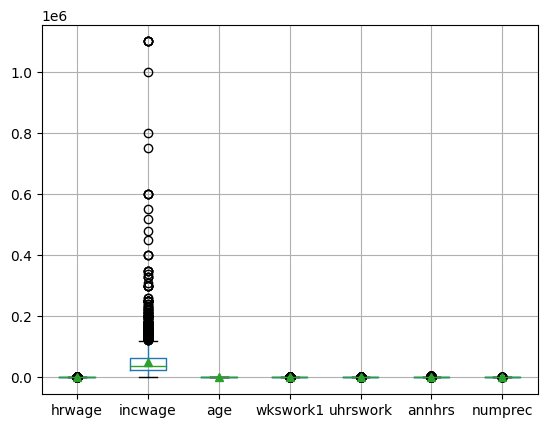

In [10]:
data.boxplot(column=['hrwage', 'incwage', 'age', 'wkswork1', 'uhrswork', 'annhrs', 'numprec' ],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

### Histograms of numerical variables

Histograms


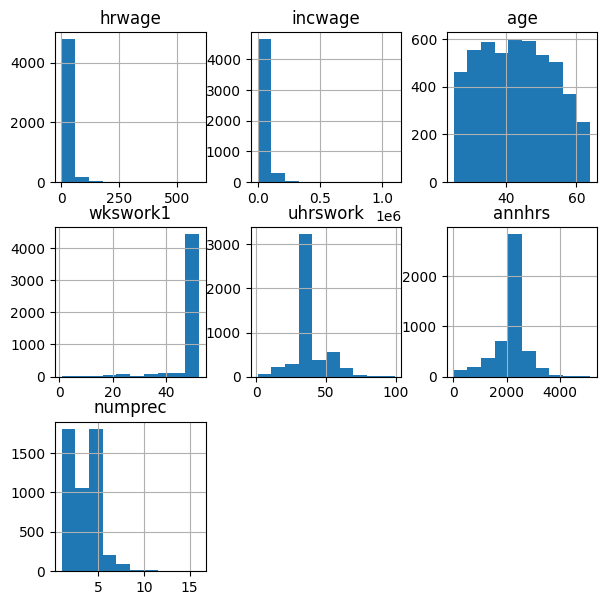

In [11]:
data.hist(column=['hrwage', 'incwage', 'age', 'wkswork1', 'uhrswork', 'annhrs', 'numprec'],  bins=10, figsize=[7,7])
print("Histograms")

### Histograms for qualitiative data

<Axes: xlabel='numprec'>

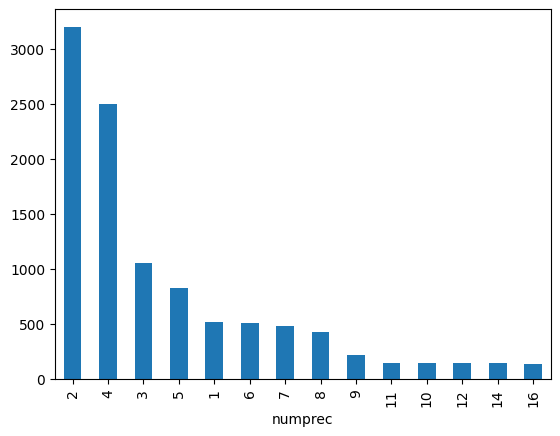

In [33]:
data.numprec.value_counts().plot(kind='bar')
data.age.value_counts().plot(kind='bar')
data.sex.value_counts().plot(kind='bar')
data.metro.value_counts().plot(kind='bar')
data.race.value_counts().plot(kind='bar')
data.region.value_counts().plot(kind='bar')
data.relate.value_counts().plot(kind='bar')
data.adj_occ2name.value_counts().plot(kind='bar')

### Univariate analysis depending on label

In [3]:
groupby_gender = data.groupby('sex')
groupby_gender.describe()

numprec                                             age                                               wkswork1                                             uhrswork                                              incwage                                                                     annhrs                                                           hrwage                                                        
         count   mean    std  min  25%  50%  75%   max   count    mean     std   min   25%   50%   75%   max    count    mean    std  min   25%   50%   75%   max    count    mean     std  min   25%   50%   75%   max   count       mean        std    min      25%      50%      75%        max   count      mean      std   min     25%     50%     75%     max   count    mean     std    min     25%     50%     75%      max
sex                                                                                                                                                                                                                                                                                                                                                                                                                                
Female  2500.0  3.171  1.438  1.0  2.0  3.0  4.0  16.0  2500.0  43.333  10.636  25.0  34.0  43.0  52.0  64.0   2500.0  49.147  8.274  1.0  52.0  52.0  52.0  52.0   2500.0  38.239   9.637  1.0  36.0  40.0  40.0  99.0  2500.0  40847.186  33262.760  640.0  20000.0  33000.0  51600.0  4.500e+05  2500.0  1899.410  588.493  10.0  1720.0  2080.0  2080.0  5148.0  2500.0  21.364  18.951  2.308  11.538  16.943  25.641  524.000
Male    2500.0  3.348  1.594  1.0  2.0  3.0  4.0  14.0  2500.0  42.748  10.495  25.0  34.0  42.0  51.0  64.0   2500.0  49.932  6.826  1.0  52.0  52.0  52.0  52.0   2500.0  42.873  10.035  4.0  40.0  40.0  45.0  99.0  2500.0  62877.600  76284.322   38.0  29000.0  46000.0  75000.0  1.100e+06  2500.0  2145.689  571.239  16.0  2080.0  2080.0  2340.0  5148.0  2500.0  27.651  24.408  2.375  14.423  21.635  33.654  591.346

Boxplots separated by Gender


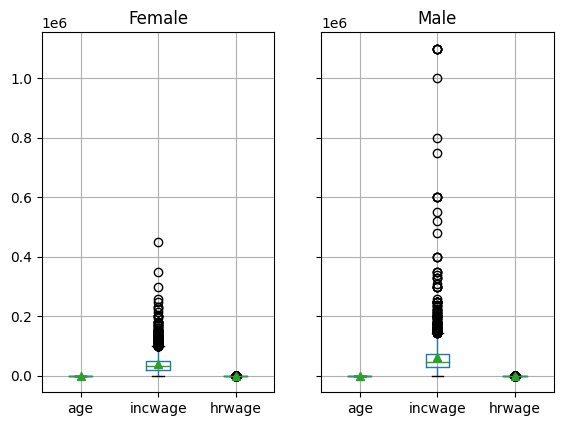

In [34]:
groupby_gender.boxplot(column=['age', 'incwage', 'hrwage'],meanline=False,showmeans=True,return_type='dict')
print('Boxplots separated by Gender')

### Bi-variate analysis

Scatter matrixes for correlations betwen numerical variables 


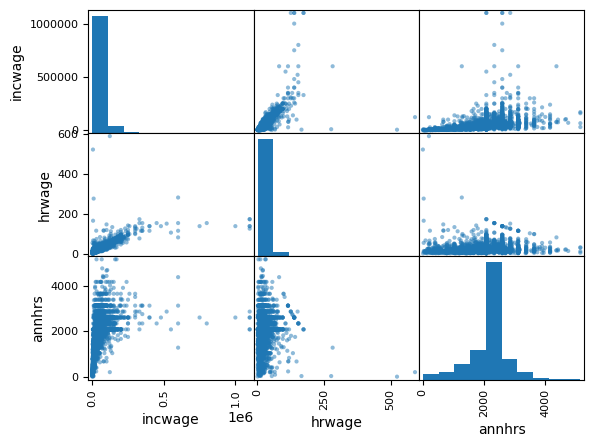

In [36]:
plotting.scatter_matrix(data[['incwage', 'hrwage', 'annhrs']])
print('Scatter matrixes for correlations betwen numerical variables ')

In [1]:
print(data.corr(method='pearson'))

NameError: name 'data' is not defined

### Creating target column
From this website https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system we will classify the status of an individual following this:

    Low income: Less than 52,200$

    Middle income: 52,200−156,600

    Upper income: More than 156,600$



In [4]:
data["incwage"].describe()

count    5.000e+03
mean     5.186e+04
std      5.986e+04
min      3.800e+01
25%      2.400e+04
50%      3.900e+04
75%      6.300e+04
max      1.100e+06
Name: incwage, dtype: float64

In [5]:
def categorise(row):
    if row['incwage'] < 52200 :
        return "low_income"
    elif row['incwage'] >= 52200 and row['incwage'] < 156000:
        return 'middle_income'
    return "upper_income"

In [6]:
data['income_lvl'] = data.apply(lambda row: categorise(row), axis=1)

In [7]:
data

,numprec,region,metro,relate,age,sex,race,marst,bpl,sch,educ99,empstat,classwkr,wkswork1,uhrswork,incwage,ftype,annhrs,hrwage,adj_ind,adj_occ2name,income_lvl
0,1,New England Division,Not in metro area,Head/Householder,62,Male,White nonhisp,Never married/single,United States,Associate's degree,Associate's degree 1,At work,"Wage/salary, private sector",52,44,57000.0,Nonfamily householder,2288,24.913,Outpatient care centers,"Consruction, Extraction, Installation",middle_income
1,3,East North Central Div.,"In metro area, outside central / principal city",Spouse,59,Male,White nonhisp,"Married, spouse present",United States,Some collage,Some collage,At work,Federal govt employee,50,40,62000.0,Primary family,2000,31.000,Not avaliable,"Consruction, Extraction, Installation",middle_income
2,4,New England Division,"In metro area, central / principal city",Head/Householder,44,Male,Hispanic,"Married, spouse present",Mexico,Grade 12,High school,At work,"Wage/salary, private sector",52,40,45000.0,Primary family,2080,21.635,"Architectural, engineering, and related services",Transportation and materials moving,low_income
3,1,South Atlantic Division,"In metro area, outside central / principal city",Head/Householder,41,Male,White nonhisp,Divorced,United States,Grade 12,High school,At work,"Wage/salary, private sector",52,42,28000.0,Nonfamily householder,2184,12.821,Real estate,Managers,low_income
4,3,New England Division,Not in metro area,Spouse,35,Male,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",50,40,42500.0,Primary family,2000,21.250,Construction,Transportation and materials moving,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,West South Central Div.,"In metro area, central / principal city",Spouse,40,Female,Hispanic,"Married, spouse present",Mexico,Grade 5,5th-8th grades,At work,"Wage/salary, private sector",32,20,7200.0,Primary family,640,11.250,Not avaliable,Office and Admin Support,low_income
4996,3,Pacific Division,"In metro area, central / principal city",Spouse,27,Female,Black nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,Local govt employee,52,40,24000.0,Primary family,2080,11.538,Offices of physicians,Office and Admin Support,low_income
4997,3,East North Central Div.,"In metro area, central / principal city",Parent,57,Female,Other nonhisp,"Married, spouse present",Korea,Bachelor's degree,Bachelor's degree,At work,"Wage/salary, private sector",52,60,13000.0,Related subfamily,3120,4.167,Not avaliable,Managers,low_income
4998,3,West North Central Div.,"In metro area, outside central / principal city",Head/Householder,53,Female,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",52,40,42000.0,Primary family,2080,20.192,Construction,Office and Admin Support,low_income


In [8]:
data["income_lvl"].unique()

array(['middle_income', 'low_income', 'upper_income'], dtype=object)

Normalization

In [9]:
scaler = StandardScaler()
num_d = data.select_dtypes(exclude=['object'])
num_d
# update the cols with their normalized values
data[num_d.columns] = scaler.fit_transform(num_d)
data

,numprec,region,metro,relate,age,sex,race,marst,bpl,sch,educ99,empstat,classwkr,wkswork1,uhrswork,incwage,ftype,annhrs,hrwage,adj_ind,adj_occ2name,income_lvl
0,-1.486,New England Division,Not in metro area,Head/Householder,1.794,Male,White nonhisp,Never married/single,United States,Associate's degree,Associate's degree 1,At work,"Wage/salary, private sector",0.324,0.341,0.086,Nonfamily householder,0.448,0.018,Outpatient care centers,"Consruction, Extraction, Installation",middle_income
1,-0.171,East North Central Div.,"In metro area, outside central / principal city",Spouse,1.510,Male,White nonhisp,"Married, spouse present",United States,Some collage,Some collage,At work,Federal govt employee,0.061,-0.055,0.169,Primary family,-0.038,0.294,Not avaliable,"Consruction, Extraction, Installation",middle_income
2,0.487,New England Division,"In metro area, central / principal city",Head/Householder,0.091,Male,Hispanic,"Married, spouse present",Mexico,Grade 12,High school,At work,"Wage/salary, private sector",0.324,-0.055,-0.115,Primary family,0.097,-0.130,"Architectural, engineering, and related services",Transportation and materials moving,low_income
3,-1.486,South Atlantic Division,"In metro area, outside central / principal city",Head/Householder,-0.193,Male,White nonhisp,Divorced,United States,Grade 12,High school,At work,"Wage/salary, private sector",0.324,0.143,-0.399,Nonfamily householder,0.272,-0.530,Real estate,Managers,low_income
4,-0.171,New England Division,Not in metro area,Spouse,-0.761,Male,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",0.061,-0.055,-0.156,Primary family,-0.038,-0.148,Construction,Transportation and materials moving,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.171,West South Central Div.,"In metro area, central / principal city",Spouse,-0.288,Female,Hispanic,"Married, spouse present",Mexico,Grade 5,5th-8th grades,At work,"Wage/salary, private sector",-2.310,-2.034,-0.746,Primary family,-2.332,-0.601,Not avaliable,Office and Admin Support,low_income
4996,-0.171,Pacific Division,"In metro area, central / principal city",Spouse,-1.518,Female,Black nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,Local govt employee,0.324,-0.055,-0.465,Primary family,0.097,-0.588,Offices of physicians,Office and Admin Support,low_income
4997,-0.171,East North Central Div.,"In metro area, central / principal city",Parent,1.321,Female,Other nonhisp,"Married, spouse present",Korea,Bachelor's degree,Bachelor's degree,At work,"Wage/salary, private sector",0.324,1.924,-0.649,Related subfamily,1.851,-0.922,Not avaliable,Managers,low_income
4998,-0.171,West North Central Div.,"In metro area, outside central / principal city",Head/Householder,0.942,Female,White nonhisp,"Married, spouse present",United States,Grade 12,High school,At work,"Wage/salary, private sector",0.324,-0.055,-0.165,Primary family,0.097,-0.196,Construction,Office and Admin Support,low_income


### Visualization by dimensionality reduction

## PCA example

In [39]:
from sklearn.datasets import load_digits
# Load the digits data
digits = load_digits()
X = digits.data
y = digits.target
print(y[1])
X[1]

1


array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Falta aplicat-ho al nostre

Text(0.5, 1.0, 'Top 2 Principal Components')

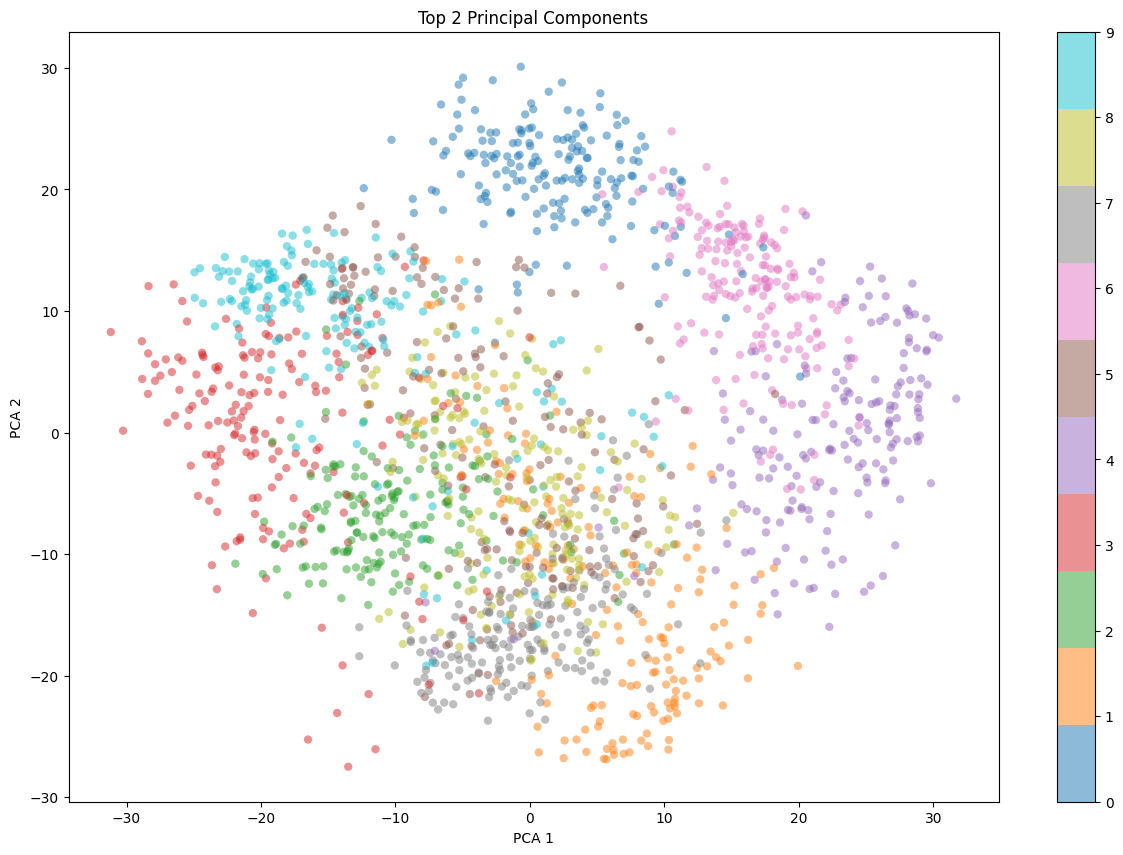

In [41]:
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)
# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar();
plt.title("Top 2 Principal Components")

Text(0.5, 0.92, 'Top 3 Principal Components')

<Figure size 1500x1000 with 0 Axes>

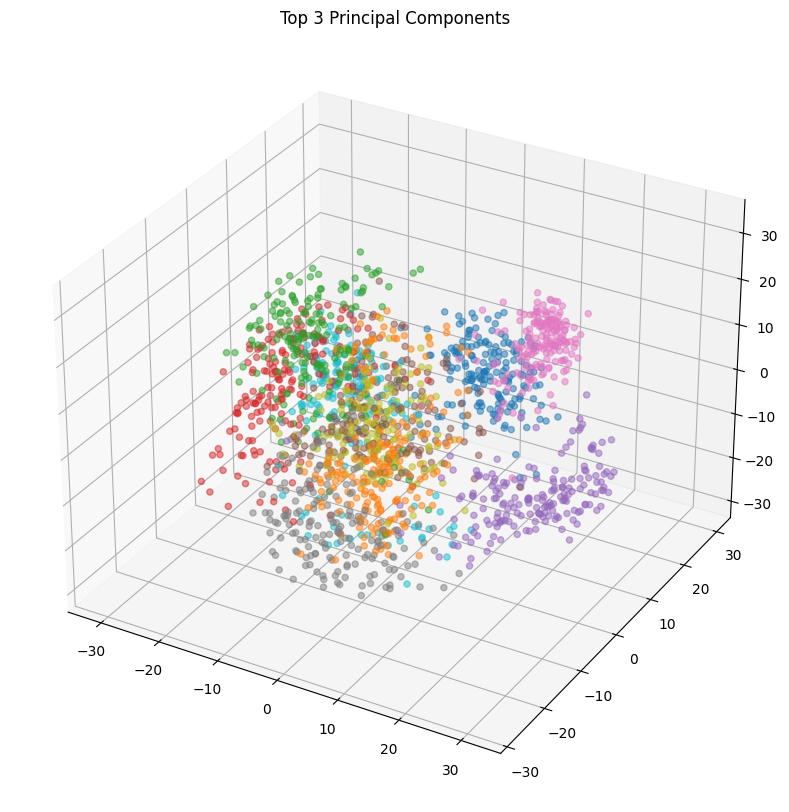

In [42]:
pca = PCA(3)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
             c=digits.target,  alpha=0.5,cmap='tab10')
plt.title("Top 3 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')